In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot 
from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_rows', 1000)

In [2]:
data = pd.read_csv('/content/Forbes Richest Athletes (Forbes Richest Athletes 1990-2021).csv')

data.reset_index(inplace=True)
data.rename(columns={'index':'S.NO','Earnings':'earnings ($ million)'},inplace=True)
data_f = data.copy()

In [3]:
data.head()

,S.NO,Name,Nationality,earnings ($ million),Year,Sport
0,0,Aaron Donald,USA,36.0,2021,Football
1,1,Aaron Donald,USA,41.4,2019,Football
2,2,Aaron Rodgers,USA,30.1,2020,Football
3,3,Aaron Rodgers,USA,89.3,2019,Football
4,4,Aaron Rodgers,USA,19.1,2015,Football


In [4]:
data.tail()

,S.NO,Name,Nationality,earnings ($ million),Year,Sport
1654,1654,Zlatan Ibrahimovic,Sweden,32.0,2017,Soccer
1655,1655,Zlatan Ibrahimovic,Sweden,37.4,2016,Soccer
1656,1656,Zlatan Ibrahimovic,Sweden,39.1,2015,Soccer
1657,1657,Zlatan Ibrahimovic,Sweden,40.4,2014,Soccer
1658,1658,Zlatan Ibrahimovic,Sweden,19.7,2013,Soccer


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  1659 non-null   int64  
 1   Name                  1659 non-null   object 
 2   Nationality           1659 non-null   object 
 3   earnings ($ million)  1659 non-null   float64
 4   Year                  1659 non-null   int64  
 5   Sport                 1659 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 77.9+ KB


In [6]:
data.columns

Index(['S.NO', 'Name', 'Nationality', 'earnings ($ million)', 'Year', 'Sport'], dtype='object')

In [7]:
print('No. of rows in the  dataset {}.'.format(data.shape[0]))
print('No. of columns in the dataset {}.'.format(data.shape[1]))
print('Shape :',data.shape)

No. of rows in the  dataset 1659.
No. of columns in the dataset 6.
Shape : (1659, 6)


In [8]:
print("Total Athletes {}".format(len(data['Name'].unique())))

Total Athletes 535


In [9]:
data.describe()

,S.NO,earnings ($ million),Year
count,1659.000000,1659.000000,1659.000000
mean,829.000000,27.523810,2009.338156
std,479.056364,20.334179,9.374635
min,0.000000,3.800000,1990.000000
25%,414.500000,17.750000,2002.000000
50%,829.000000,24.000000,2013.000000
75%,1243.500000,32.000000,2017.000000
max,1658.000000,300.000000,2021.000000


In [10]:
data.describe(include='object')

,Name,Nationality,Sport
count,1659,1659,1659
unique,535,44,15
top,Tiger Woods,USA,Basketball
freq,25,1122,403


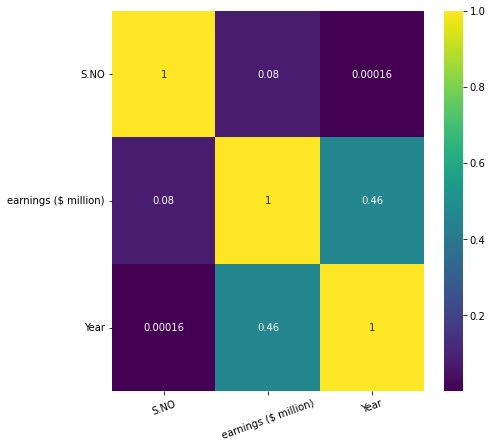

In [11]:
cor = data.corr()

plt.figure(figsize=(7,7))
sns.heatmap(cor,cmap=plt.cm.viridis,annot=True)
plt.xticks(rotation = 20)
plt.yticks(rotation = 0)
plt.show()

In [12]:
data.isnull().sum()

S.NO                    0
Name                    0
Nationality             0
earnings ($ million)    0
Year                    0
Sport                   0
dtype: int64

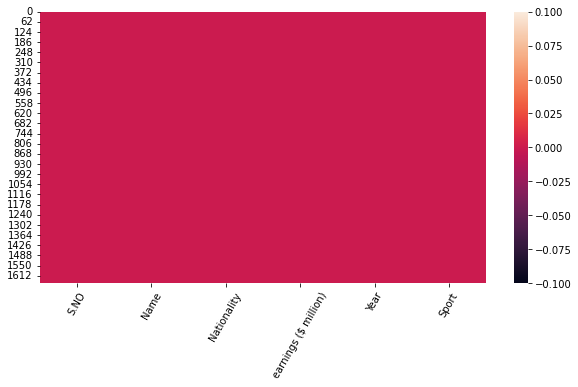

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())
plt.xticks(rotation = 60)
plt.show()

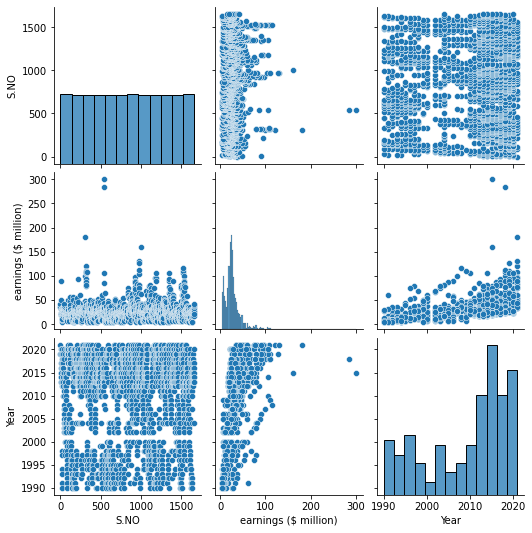

In [14]:
sns.pairplot(data)
plt.show()

In [15]:
# Convert string to datetime64
data['Year'] = data['Year'].apply(pd.to_datetime,format='%Y')
data_f['Year'] = data_f['Year'].apply(pd.to_datetime,format='%Y')

# Adding a year column.
data['year'] = pd.DatetimeIndex(data['Year']).year  
data.drop('Year',axis=1,inplace=True)


data_f['year'] = pd.DatetimeIndex(data_f['Year']).year  
data_f.drop('Year',axis=1,inplace=True)

# Converting the sport column to uppercase
data['Sport'] = data['Sport'].str.upper()
data.head()

,S.NO,Name,Nationality,earnings ($ million),Sport,year
0,0,Aaron Donald,USA,36.0,FOOTBALL,2021
1,1,Aaron Donald,USA,41.4,FOOTBALL,2019
2,2,Aaron Rodgers,USA,30.1,FOOTBALL,2020
3,3,Aaron Rodgers,USA,89.3,FOOTBALL,2019
4,4,Aaron Rodgers,USA,19.1,FOOTBALL,2015


In [16]:
athlete = data.groupby(['Name'])['Name'].count().reset_index(name='Count').sort_values('Count', ascending=False).head(10)
athlete

,Name,Count
494,Tiger Woods,25
369,Michael Jordan,19
422,Phil Mickelson,18
474,Serena Williams,16
480,Shaquille ONeal,16
372,Michael Schumacher,16
24,Andre Agassi,15
44,Arnold Palmer,15
241,Jeff Gordon,15
304,Kobe Bryant,15


In [17]:
fig = px.bar(athlete, x = 'Count', y = 'Name', title= 'Atheltes who have appeared the most on Forbes highest paid athletes list',color='Name', labels={"Name": "Atheltes", "Count": "Number of appearances"})
fig.update_layout(yaxis_categoryorder = 'total ascending')
fig.show()

In [18]:
earnings = data.groupby(['Name'])['earnings ($ million)'].sum().reset_index().sort_values('earnings ($ million)', ascending=False).head(20)
earnings

,Name,earnings ($ million)
494,Tiger Woods,1632.2
182,Floyd Mayweather,944.5
108,Cristiano Ronaldo,942.9
449,Roger Federer,933.1
327,Lionel Messi,911.5
317,LeBron James,820.5
422,Phil Mickelson,781.7
369,Michael Jordan,739.2
372,Michael Schumacher,703.0
304,Kobe Bryant,621.0


In [19]:
fig = px.bar(earnings, x = 'earnings ($ million)', y = 'Name', title= 'Total earnings for athletes on the Forbes list between 1990-2021', labels={"Name": "Athletes", "earnings ($ million)": "Total earnings (in US$ million)"})
fig.update_layout(yaxis_categoryorder = 'total ascending',width = 1500,height = 500)
fig.show()

In [20]:
def athlete_earnings_plot(dataframe,athlete_name,image_path,opacity,color,width,height):
    """
    This function  creates a plotly line chart with image of the athlete in the background
    
    """
    athlete = dataframe[dataframe['Name'] == athlete_name]

    trace = go.Scatter(
                    x = athlete['year'],
                    y = athlete['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color=color,line=dict(color=color,width=6)),
                    )
    data = [trace]
    layout= go.Layout(title= f'{athlete_name}' +"'s earnings over the Years",
                          xaxis=dict(title='Year'),
                          yaxis=dict(title="Earnings in US$ (millions)"),
                          images= [dict(source=Image.open(image_path),
                                        xref= "paper",
                                        yref= "paper",
                                        x= 0.5,
                                        y= 0.5,
                                        sizex= 1,
                                        sizey= 1,
                                        sizing= "stretch",
                                        opacity= opacity,
                                        xanchor= "center", 
                                        yanchor="middle",
                                        layer= "below")])
                                        
    fig = go.Figure(data = data, layout = layout)
    fig.update_layout(width = width,height=height)
    iplot(fig)


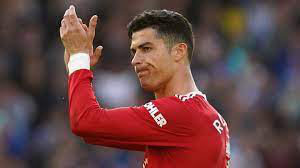

In [22]:
athlete_earnings_plot(data,'Cristiano Ronaldo','/content/download.jpg',opacity=0.6,color = 'red',width = 1000,height =600)


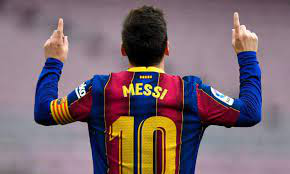

In [23]:
athlete_earnings_plot(data,'Lionel Messi','/content/download (1).jpg',opacity=0.6,color = 'blue',width = 1000,height =600)


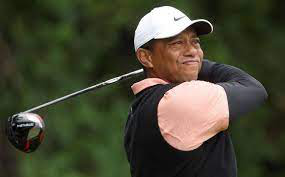

In [24]:
athlete_earnings_plot(data,'Tiger Woods','/content/download (2).jpg',opacity=0.6,color = 'red',width = 1000,height =600)

In [25]:
yearwise_earning = data.groupby('year').sum()
yearwise_earning.sort_values('earnings ($ million)',ascending=False).head(7)

,S.NO,earnings ($ million)
year,,
2019,76680,3998.9
2018,83172,3814.9
2020,77636,3622.3
2015,79777,3218.7
2016,80708,3152.4
2017,76443,3109.4
2021,43899,2757.0


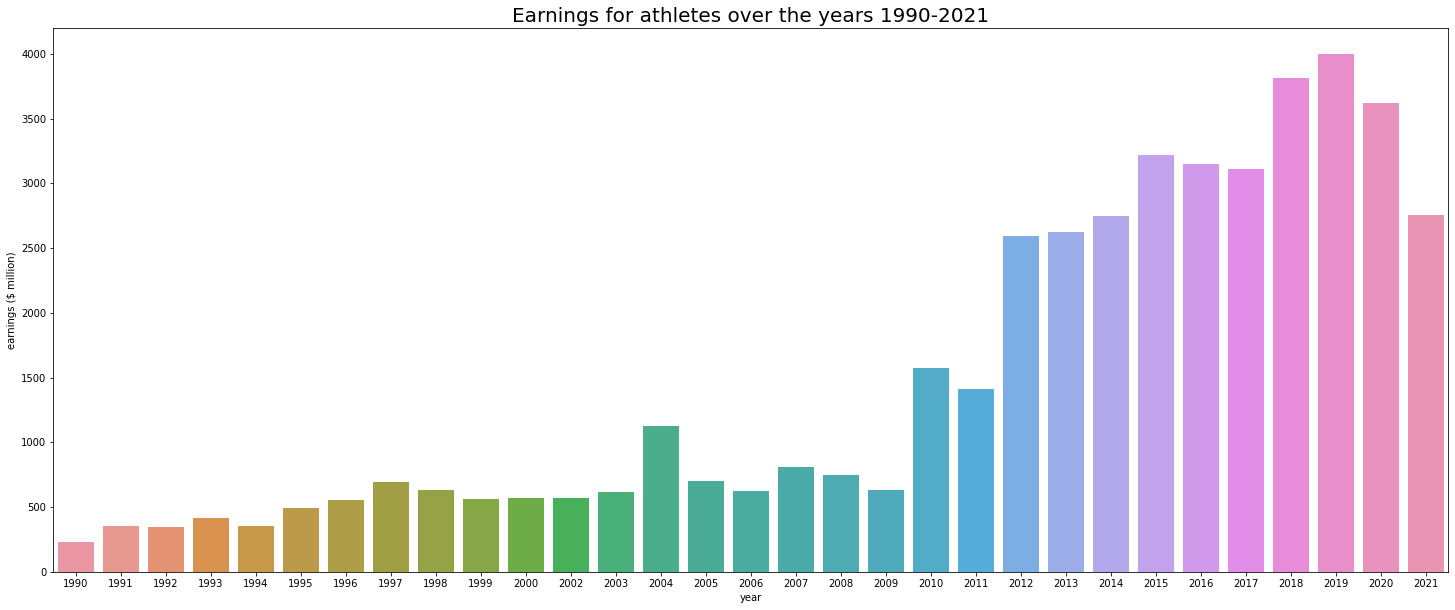

In [26]:
plt.figure(figsize=(25,10))
sns.barplot(x=yearwise_earning.index, y='earnings ($ million)', data=yearwise_earning)
plt.title("Earnings for athletes over the years 1990-2021",fontsize= 20)
plt.show()

In [27]:
nationalitywise_earning = data.groupby(by = 'Nationality').sum().sort_values('earnings ($ million)',ascending=False)

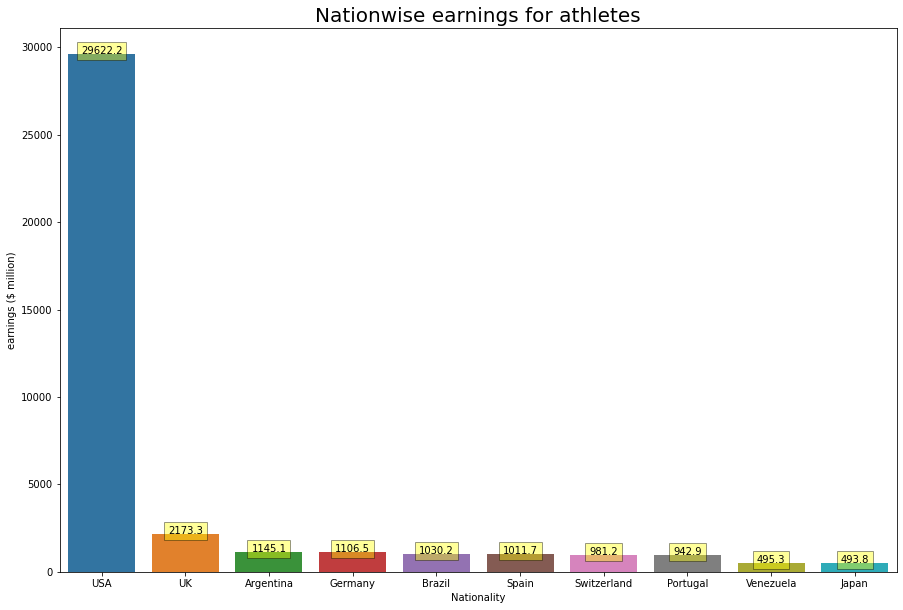

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x=nationalitywise_earning.index[:10], y='earnings ($ million)', data=nationalitywise_earning[:10])
for i in range(len(nationalitywise_earning.index[:10])):
        plt.text(i,nationalitywise_earning['earnings ($ million)'][i],nationalitywise_earning['earnings ($ million)'][i], ha = 'center',bbox = dict(facecolor = 'yellow', alpha =.4))
plt.title("Nationwise earnings for athletes",fontsize= 20)
plt.show()

In [29]:
nation_and_sportwise_earning = data.groupby(by = ['Nationality','Sport']).sum()
nation_and_sportwise_earning

S.NO  earnings ($ million)    year
Nationality        Sport                                                   
Argentina          SOCCER               22662                1116.4   44310
                   TENNIS                2790                  28.7    9960
Australia          BASEBALL              4779                  64.4    6039
                   BASKETBALL            5439                 222.8   12111
                   GOLF                  7504                 142.5   23966
                   RACING                 357                  29.0    2020
Austria            RACING                4109                  60.5   13951
Belgium            RACING                1074                  42.5    2021
                   SOCCER                 979                  41.6    4031
                   TENNIS                 810                  12.5    2008
Brazil             RACING                2750                  85.2   13944
                   SOCCER               29848                 945.0   50314
Canada             BASEBALL              1523                  48.8    4037
                   BASKETBALL              97                  26.1    2019
                   BOXING                1325                  10.2    1991
                   HOCKEY               17586                 137.1   25931
                   RACING                1327                  43.0    4005
Chile              SOCCER                 101                  56.4    4039
China              BASKETBALL            6538                  98.1    8032
                   TENNIS                2895                  60.2    6039
Colombia           SOCCER                4650                 134.3   10077
Cuba               BASEBALL              4926                  78.4    6053
Dominican Republic BASEBALL              7102                 151.6   18072
                   BASKETBALL             895                 137.8   10094
Egypt              SOCCER                3486                  97.7    6060
Finland            RACING                5552                 211.0   12065
France             BASKETBALL            2387                  44.4    4035
                   RACING                2151                  58.5   11954
                   SOCCER               11679                 342.9   24205
German             BASKETBALL            2240                 111.7   10065
                   TENNIS                9816                  82.5   21918
Germany            RACING               30651                 987.4   50175
                   SOCCER                4467                 119.1   10084
Greek              BASKETBALL            2374                 173.3    8078
India              CRICKET              13211                 256.6   20153
                   GOLF                  1595                  25.8    2007
Iran               SOCCER                1339                  19.5    2014
Ireland            MIXED MARTIAL ARTS    1234                 374.0    8078
                   MMA                    623                  56.0    4033
Italy              RACING               15303                 252.0   20057
                   SOCCER                1338                   5.3    1994
Ivory Coast        SOCCER                6998                 102.3   10067
Jamaica            TRACK                11011                 186.4   14105
Japan              BASEBALL              7415                 205.5   18116
                   TENNIS                7300                 288.3   16146
Kazakhstan         BOXING                1143                  50.5    4037
Latvia             BASKETBALL             897                  24.5    2020
Mexico             BOXING                4656                 313.0   22100
                   GOLF                   982                  10.0    2008
New Zealand        BASKETBALL            3007                  50.7    4037
                   FOOTBALL                97                  61.0    4033
Peru         

In [30]:
sportwise_earning = data.groupby(by = 'Sport').sum().sort_values('earnings ($ million)',ascending=False)
sportwise_earning

,S.NO,earnings ($ million),year
Sport,,,
BASKETBALL,312034,11574.8,810425
FOOTBALL,206190,7209.9,523296
BASEBALL,200699,5818.1,572686
SOCCER,138146,5402.8,296113
GOLF,110969,3917.3,246777
RACING,112972,3614.0,276789
BOXING,85915,3492.0,200362
TENNIS,158092,3477.6,316759
MIXED MARTIAL ARTS,1234,374.0,8078


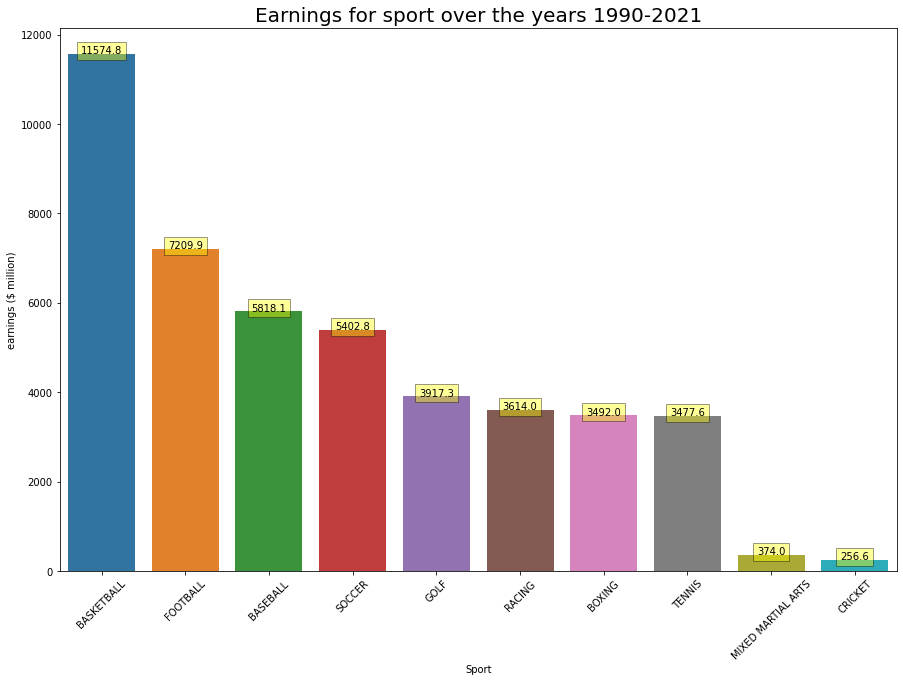

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x=sportwise_earning.index[:10], y='earnings ($ million)', data=sportwise_earning[:10])
for i in range(len(sportwise_earning.index[:10])):
        plt.text(i,sportwise_earning['earnings ($ million)'][i],sportwise_earning['earnings ($ million)'][i], ha = 'center',bbox = dict(facecolor = 'yellow', alpha =.4))
plt.xticks(rotation = 45)
plt.title("Earnings for sport over the years 1990-2021",fontsize= 20)
plt.show()

In [32]:
sport_name = {'baseball' : 'Baseball', 'F1 Motorsports' : 'F1 racing', 'soccer' : 'Soccer', 'golf' : 'Golf',
          'basketball' : 'Basketball', 'boxing' : 'Boxing', 'auto racing':'Auto Racing',
         'Auto Racing (Nascar)':'Auto Racing', 'Auto racing':'Auto Racing', 'ice hockey':'Ice Hockey',
         'American Football / Baseball':'American Football','NASCAR':'Auto Racing','NFL':'American Football'}
data['Sport'] = data.Sport.replace(sport_name)

data_f['Sport'] = data_f.Sport.replace(sport_name)

In [33]:
national_count = data.groupby('Nationality')['Name'].count().reset_index(name="count")
national_count.sort_values('count',ascending=False).head(10)

,Nationality,count
39,USA,1122
38,UK,74
35,Spain,34
4,Brazil,32
15,Germany,30
0,Argentina,27
1,Australia,22
37,Switzerland,20
13,France,20
42,Venezuela,20


In [34]:
fig = px.pie(national_count, 'Nationality', 'count', 
       color_discrete_sequence=px.colors.sequential.Viridis, 
       title="Tallied Representation of a Nation's Athletes on the Forbes List between 1990-2021")
fig.update_layout(width = 1000,height=1500)

In [35]:
sport_appea_count = data_f.groupby('Sport').count()[['year','S.NO']]
sport_appea_count['earning'] = data_f.groupby('Sport').sum()['earnings ($ million)']
sport_appea_count['average'] = sport_appea_count.earning / sport_appea_count.year
sport_appea_count = sport_appea_count.drop('S.NO',axis=1)
sport_appea_count = sport_appea_count.rename(columns={'year':'count'})
sport_appea_count.sort_values('earning',ascending=False).head(10)

,count,earning,average
Sport,,,
Basketball,403,11574.8,28.721588
Football,260,7209.9,27.730385
Baseball,285,5818.1,20.414386
Soccer,147,5402.8,36.753741
Golf,123,3917.3,31.847967
Racing,138,3614.0,26.188406
Boxing,100,3492.0,34.920000
Tennis,158,3477.6,22.010127
Mixed Martial Arts,4,374.0,93.500000


In [36]:
fig = px.pie(sport_appea_count, sport_appea_count.index, 'count', 
       color_discrete_sequence=px.colors.sequential.Cividis, 
       title="Tallied Representation of Sports on the Forbes List between 1990-2021")
fig.update_layout(width = 1000,height=1200)


In [37]:
sport_appea_count.sort_values('average',ascending=False).head(10)

,count,earning,average
Sport,,,
Mixed Martial Arts,4,374.0,93.500000
Soccer,147,5402.8,36.753741
Boxing,100,3492.0,34.920000
Golf,123,3917.3,31.847967
Basketball,403,11574.8,28.721588
MMA,2,56.0,28.000000
Football,260,7209.9,27.730385
Track,7,186.4,26.628571
Racing,138,3614.0,26.188406


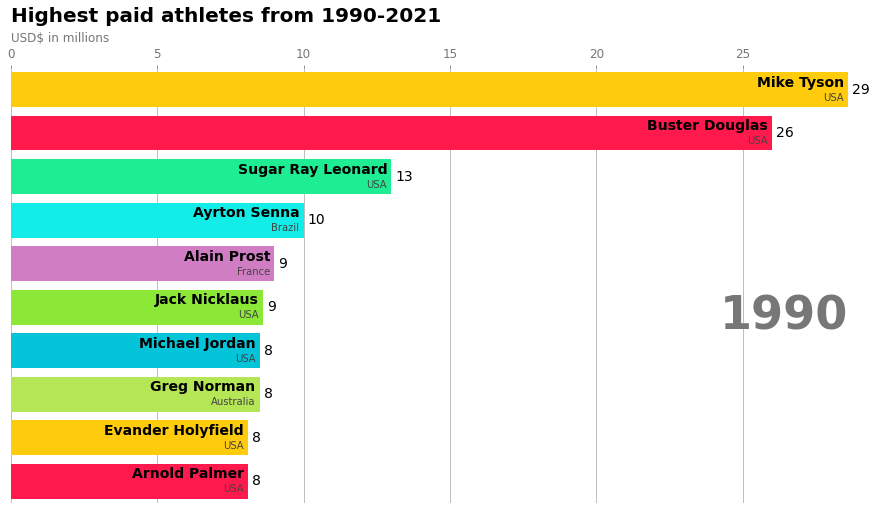

In [38]:
df1 = data_f[['Name','Nationality','year','earnings ($ million)']]

df1.rename(columns={'earnings ($ million)':'value'},inplace=True)

group_lk = data_f.set_index('Name')['Nationality'].to_dict()

colors = [ '#FF194D','#FFCC0D','#B5E655','#04C4D9','#8BE836','#d17dc3','#13EDE7','#1EED93']

fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = df1[df1['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Name'], dff['value'], color=colors)
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['Name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'USD$ in millions', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.14, 'Highest paid athletes from 1990-2021',transform=ax.transAxes, size=20, weight=600, 
            ha='left', va='top',bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1990, 2022));
HTML(animator.to_jshtml())